In [ ]:
### ### THIS NOTEBOOK USES REAL LLM and imports functions and classes from other files !!!

In [1]:
from ClassSARenvironment import SARenv
from ClassQlearningAgent import QLearningAgent
from ClassQlearningAttentionAgent import QLearningAgentAttention
from utils_functions import animate_policy, evaluate_policy, plot_learning_curve, plot_steps, visitation_heatmap

In [2]:
# Example initialization and training
gridsize = [7, 7]
startState = [(4, 1)]
victimStates = [(0, 3)]
ditches = [(1, 6), (2, 1), (2, 2), (2, 4), (3, 2), (3, 3), (3, 4), (3, 5),\
    (5, 0), (5, 1), (5, 2), (6, 0), (0, 2), (0, 4), (5, 5)]
fires = []
POIs = []  # Victim locations
infoLocation = [(6, 1)]  # Location to ask for information was (6, 1)
image_path = "/home/research100/Documents/sample/enhanced_RL/enhanced_RL/images/disaster_area.jpg"
#document_path = "/home/research100/Documents/sample/enhanced_RL/enhanced_RL/data/sar_data.pdf"
document_path = '/home/research100/Documents/sample/enhanced_RL/enhanced_RL/data/sar_data.json'

document json will be infused


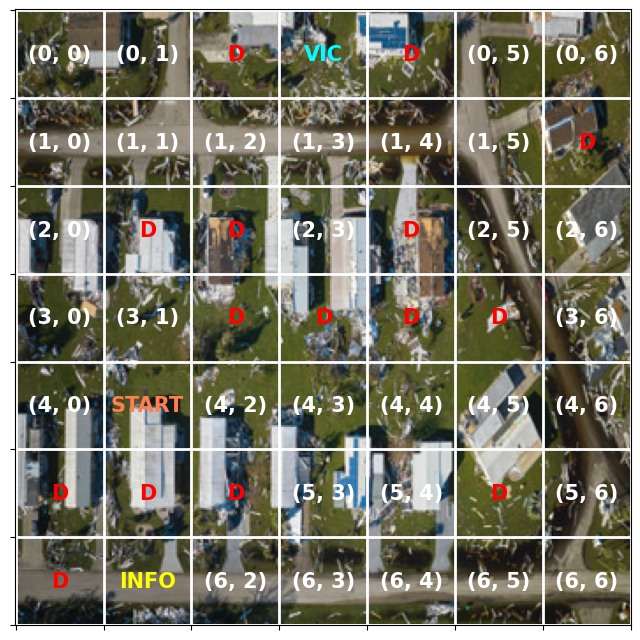

In [3]:
env = SARenv(gridsize, startState, victimStates, ditches, fires, POIs, infoLocation, image_path, document_path, mode='mode')

In [4]:
EPISODES = 1500
ALPHA = 0.1
GAMMA = 0.998
EPSILON_MAX = 1.0
EPSILON_MIN = 0.01
DECAY_RATE = 2
agent_rescuer = QLearningAgent(env, ALPHA, GAMMA, EPSILON_MAX, EPSILON_MIN, DECAY_RATE, EPISODES)
Q_table, total_returns, state_visitations_simple, exploration_simple, exploitation_simple, total_steps, eps_history = agent_rescuer.train_agent()


  0%|          | 0/1500 [00:00<?, ?it/s]

Number of requested results 4 is greater than number of elements in index 1, updating n_results = 1


episode: 0 | reward: 0 | ε: 1.0
episode: 250 | reward: -64 | ε: 0.6666666666666756
real LLM is about to start handling the input Hey, there's a victim at the hospital and I think I also saw fire in the train station and the bank. Hey, you wait! Someone told me about screams heard at the school and close to the mall. Hurry!
Hazardous Coordinates: [(5, 6), (4, 5)]
Point of Interest Coordinates: [(0, 3), (2, 0), (3, 0)]
real LLM is about to end handling the input Hey, there's a victim at the hospital and I think I also saw fire in the train station and the bank. Hey, you wait! Someone told me about screams heard at the school and close to the mall. Hurry!
episode: 500 | reward: -28 | ε: 0.3333333333333443
episode: 750 | reward: 70 | ε: 0.01
episode: 1000 | reward: 81 | ε: 0.01
episode: 1250 | reward: 81 | ε: 0.01
Exploration count: 4065
Exploitation count: 28964


document json will be infused


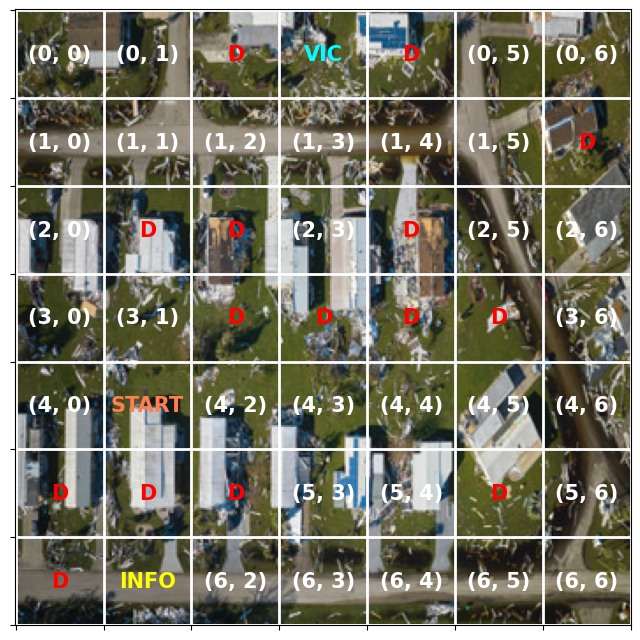

In [5]:
env = SARenv(gridsize, startState, victimStates, ditches, fires, POIs, infoLocation, image_path, document_path, mode='mode')

  0%|          | 0/1500 [00:00<?, ?it/s]

Number of requested results 4 is greater than number of elements in index 2, updating n_results = 2


episode: 0 | reward: 0 | ε: 1.0
episode: 250 | reward: -48 | ε: 0.6666666666666756
real LLM is about to start handling the input Hey, there's a victim at the hospital and I think I also saw fire in the train station and the bank. Hey, you wait! Someone told me about screams heard at the school and close to the mall. Hurry!
Hazardous Coordinates: [(5, 6), (4, 5)]
Point of Interest Coordinates: [(0, 3), (2, 0), (3, 0)]
real LLM is about to end handling the input Hey, there's a victim at the hospital and I think I also saw fire in the train station and the bank. Hey, you wait! Someone told me about screams heard at the school and close to the mall. Hurry!
Got the info needed at ep 281
Exploitation mode started at episode 281
episode: 500 | reward: 83 | ε: 0.01
Exploitation mode ends at episode 730
episode: 750 | reward: 83 | ε: 0.01
episode: 1000 | reward: 83 | ε: 0.01
episode: 1250 | reward: 83 | ε: 0.01
Exploration count: 1855
Exploitation count: 34629
POIs identified during training [(

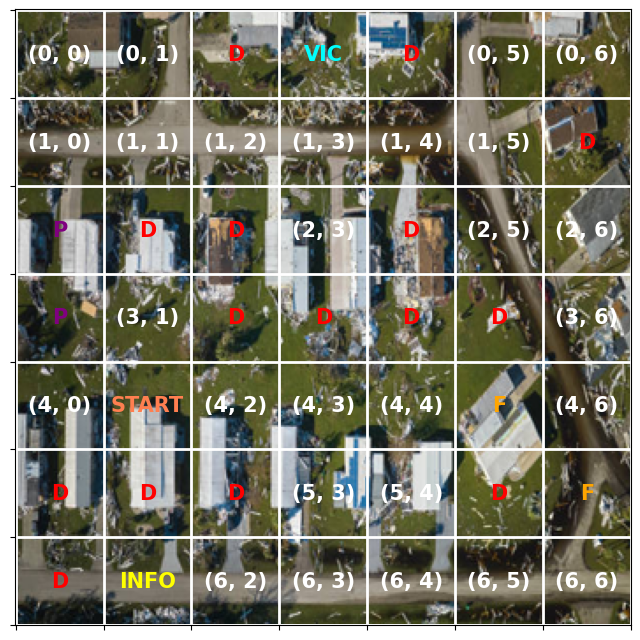

In [6]:
EPISODES = 1500
ALPHA = 0.1
GAMMA = 0.998
EPSILON_MAX = 1.0
EPSILON_MIN = 0.01
DECAY_RATE = 2
agent_rescuer_ATT = QLearningAgentAttention(env, ALPHA, GAMMA, EPSILON_MAX, EPSILON_MIN, DECAY_RATE, EPISODES, image_path)
Q_tableATT, total_returnsATT, state_visitations_simpleATT, exploration_simpleATT, exploitation_simpleATT, total_stepsATT, eps_historyATT, attentionATT = agent_rescuer_ATT.train_agent()

Line appears at episode: 555 for agent Q+


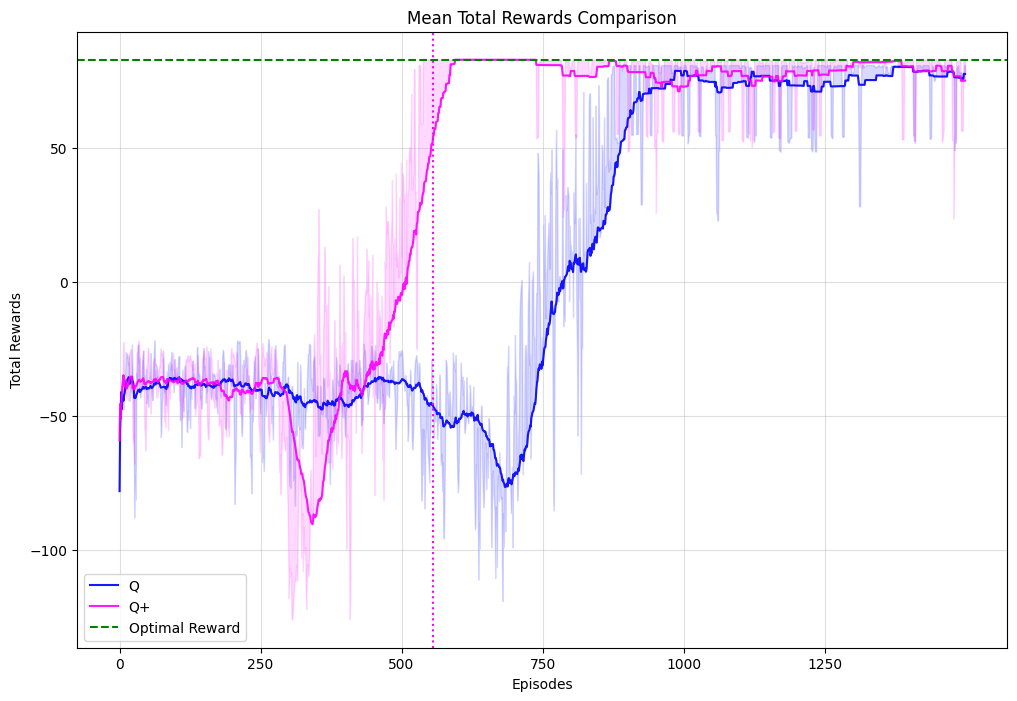

In [7]:
labels = ["Q", "Q+"]
colors = ["blue", "magenta"]
total_rewards_list = [total_returns, total_returnsATT]#, avg_total_rewards_AGENT_1_ATTENTION]
plot_learning_curve(total_rewards_list, EPISODES, labels, colors, optimal_reward=83)

In [11]:
evaluate_policy(env, num_eval_episodes=1, max_eval_steps_per_episode=100, agent=agent_rescuer)

In ((4, 1), False) --> RIGHT --> get -1 reward | TOTAL REWARD -1
In ((4, 2), False) --> RIGHT --> get -1 reward | TOTAL REWARD -2
In ((4, 3), False) --> DOWN --> get -1 reward | TOTAL REWARD -3
In ((5, 3), False) --> DOWN --> get -1 reward | TOTAL REWARD -4
In ((6, 3), False) --> LEFT --> get -1 reward | TOTAL REWARD -5
In ((6, 2), False) --> LEFT --> get -1 reward | TOTAL REWARD -6
In ((6, 1), False) --> ASK --> get 4 reward | TOTAL REWARD -2
In ((6, 1), True) --> RIGHT --> get -1 reward | TOTAL REWARD -3
In ((6, 2), True) --> RIGHT --> get -1 reward | TOTAL REWARD -4
In ((6, 3), True) --> UP --> get -1 reward | TOTAL REWARD -5
In ((5, 3), True) --> UP --> get -1 reward | TOTAL REWARD -6
In ((4, 3), True) --> RIGHT --> get -1 reward | TOTAL REWARD -7
In ((4, 4), True) --> RIGHT --> get -1 reward | TOTAL REWARD -8
In ((4, 5), True) --> RIGHT --> get -1 reward | TOTAL REWARD -9
In ((4, 6), True) --> UP --> get -1 reward | TOTAL REWARD -10
In ((3, 6), True) --> UP --> get -1 reward | TOT

In [12]:
evaluate_policy(env, num_eval_episodes=1, max_eval_steps_per_episode=100, agent=agent_rescuer_ATT)

In ((4, 1), False) --> RIGHT --> get -1 reward | TOTAL REWARD -1
In ((4, 2), False) --> RIGHT --> get -1 reward | TOTAL REWARD -2
In ((4, 3), False) --> DOWN --> get -1 reward | TOTAL REWARD -3
In ((5, 3), False) --> DOWN --> get -1 reward | TOTAL REWARD -4
In ((6, 3), False) --> LEFT --> get -1 reward | TOTAL REWARD -5
In ((6, 2), False) --> LEFT --> get -1 reward | TOTAL REWARD -6
In ((6, 1), False) --> ASK --> get 4 reward | TOTAL REWARD -2
In ((6, 1), True) --> RIGHT --> get -1 reward | TOTAL REWARD -3
In ((6, 2), True) --> RIGHT --> get -1 reward | TOTAL REWARD -4
In ((6, 3), True) --> UP --> get -1 reward | TOTAL REWARD -5
In ((5, 3), True) --> UP --> get -1 reward | TOTAL REWARD -6
In ((4, 3), True) --> LEFT --> get -1 reward | TOTAL REWARD -7
In ((4, 2), True) --> LEFT --> get -1 reward | TOTAL REWARD -8
In ((4, 1), True) --> LEFT --> get -1 reward | TOTAL REWARD -9
In ((4, 0), True) --> UP --> get -1 reward | TOTAL REWARD -10
In ((3, 0), True) --> UP --> get -1 reward | TOTAL 

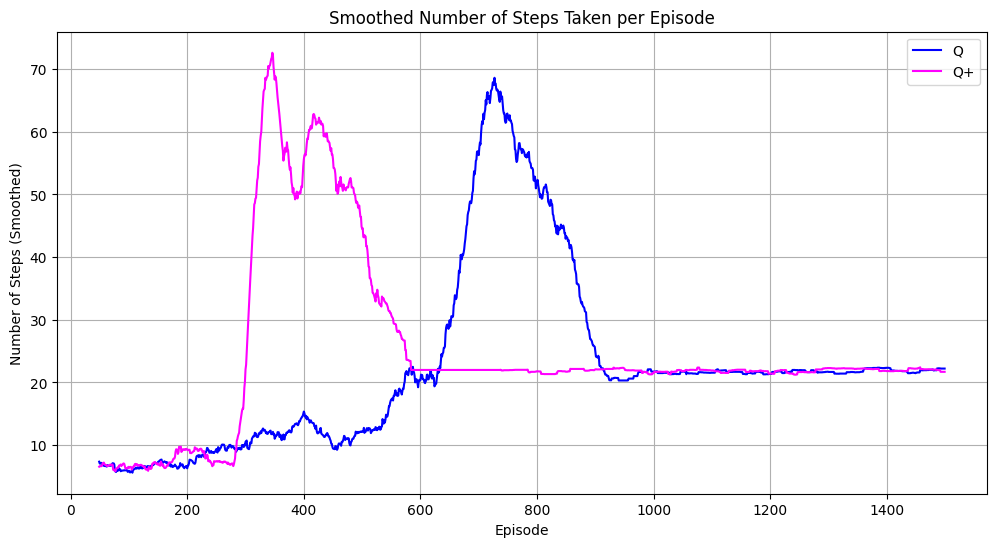

In [8]:
total_steps_list = [total_steps, total_stepsATT]
plot_steps(total_steps_list, EPISODES)

In [ ]:
#animate_policy(env, agent=agent_rescuer, iterations=1)
animate_policy(env, agent=agent_rescuer_ATT, iterations=1)

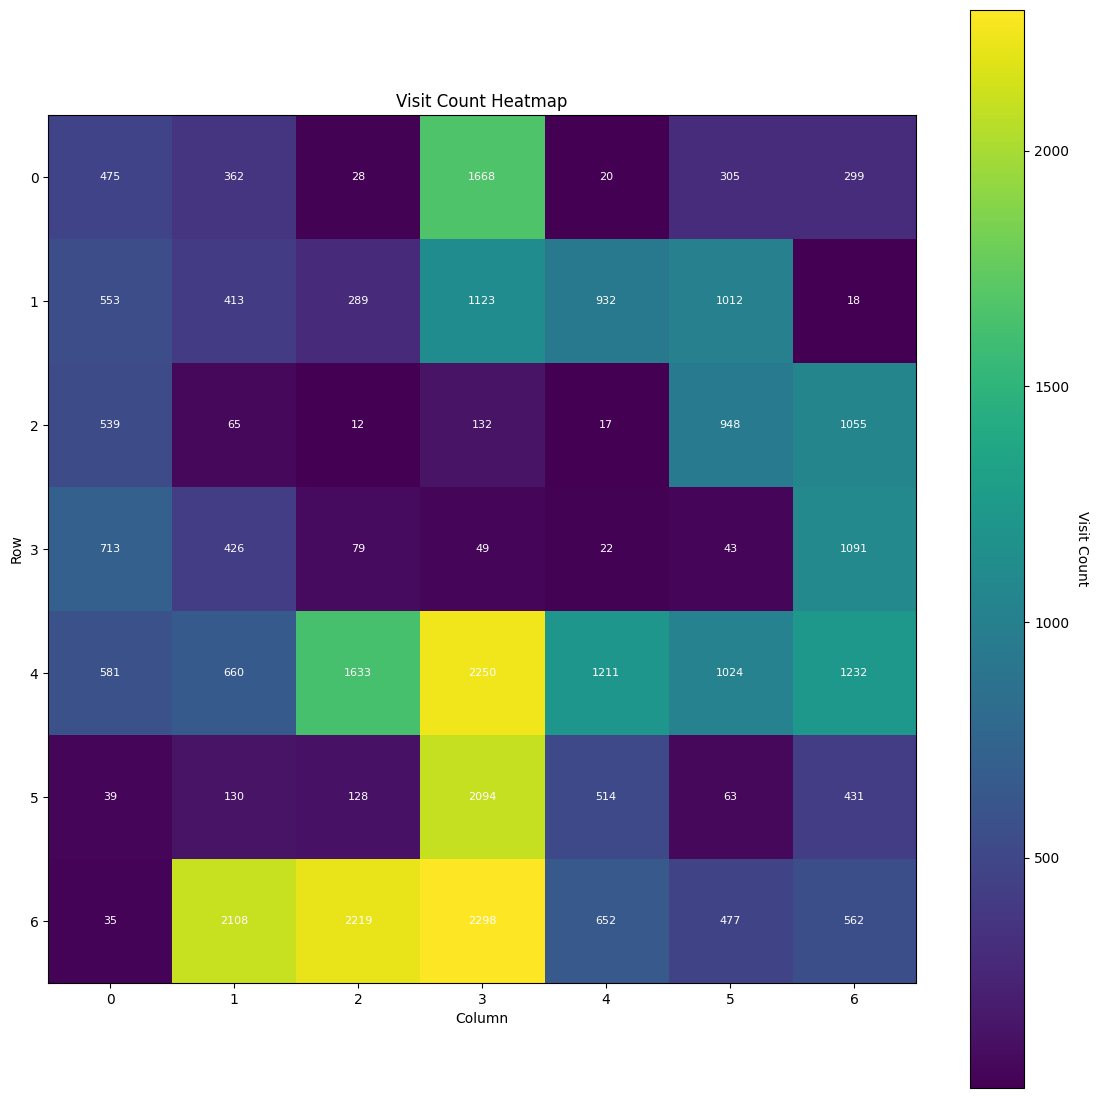

In [9]:
visitation_heatmap(state_visitations_simple, env.gridsize)

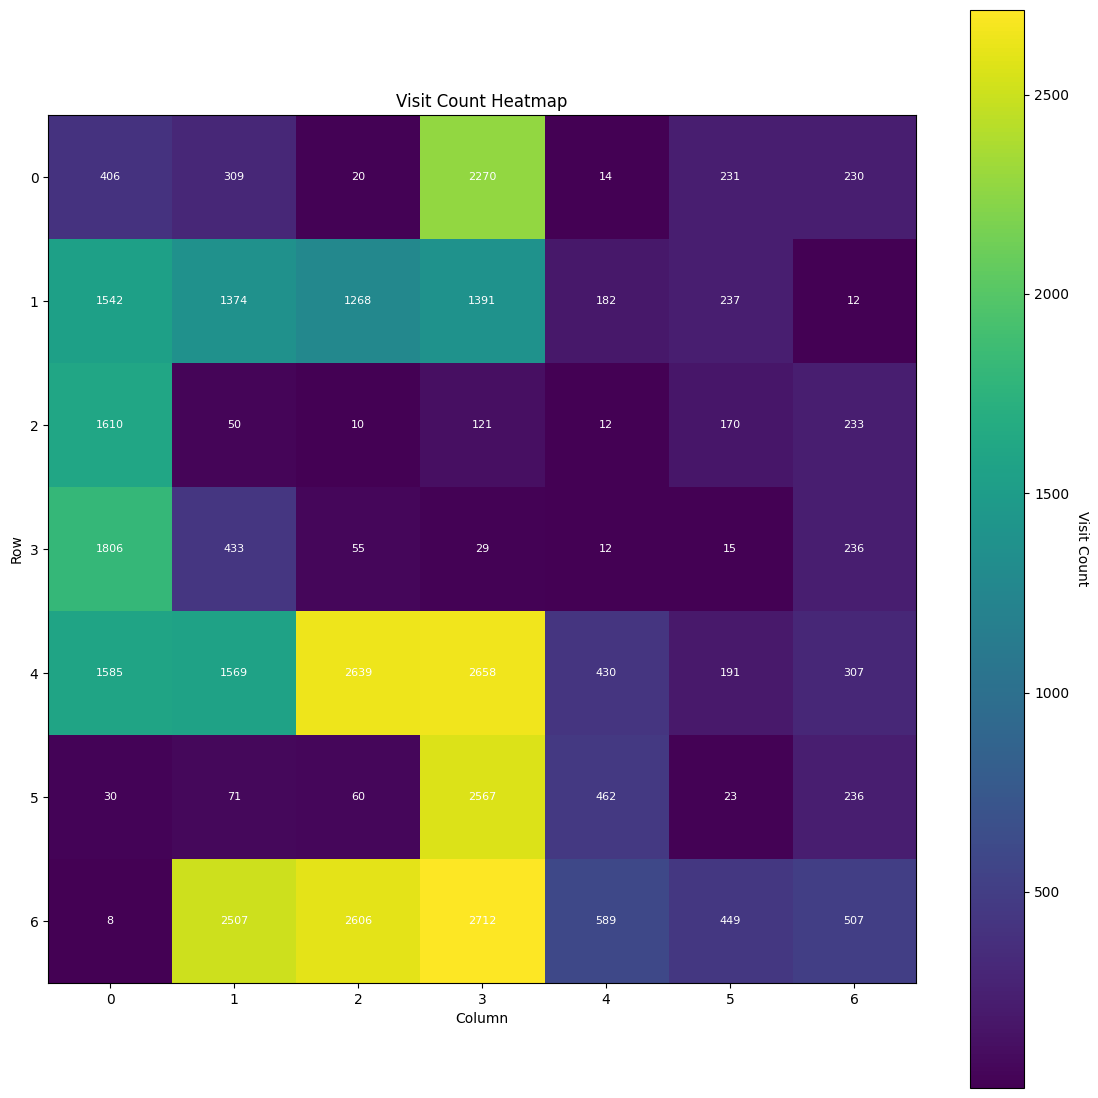

In [10]:
visitation_heatmap(state_visitations_simpleATT, env.gridsize)